# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_4$"
- El mensaje que llegó fue: "12, 18, 9, 25"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [30]:
m = 16
a = 5
b = 3
seed = 7
ciphertext = [12, 18, 9, 25]
num_letters = len(ciphertext)

x1 = (a * seed + b) % m
x2 = (a * x1 + b) % m
x3 = (a * x2 + b) % m

decoded_message = []

for i in range(num_letters):
    x_current = (a * x3 + b) % m
    decoded_letter = (ciphertext[i] - x_current) % m
    decoded_message.append(decoded_letter)
    x3 = x_current

decoded_text = ''.join([chr(decoded_letter + ord('A')) for decoded_letter in decoded_message])

print(decoded_text)


BIEN



## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 

In [3]:
def montecarlo(f,N,a,b):
    u= np.random.uniform(a,b,N)
    media= np.mean(f(u))
    return media*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [5]:
def f1(x):
    return (1+x**4)**(1/2)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(-(x**2)/2)
a=4
b=5
N = np.logspace(1,5,5)
table=pd.DataFrame(columns=["Aproximación 1","Aproximación 2","Aproximación 3","Aproximación 4"],index=N)


for i in N:
    aprox1 = montecarlo(f1, int(i), a, b)
    aprox2 = montecarlo(f2, int(i), a, b)
    aprox3 = montecarlo(f3, int(i), a, b)
    aprox4 = montecarlo(f4, int(i), a, b)
    table.loc[i,"Aproximación 1"] = aprox1
    table.loc[i,"Aproximación 2"] = aprox2
    table.loc[i,"Aproximación 3"] = aprox3
    table.loc[i,"Aproximación 4"] = aprox4
table

,Aproximación 1,Aproximación 2,Aproximación 3,Aproximación 4
10.0,20.627545,0.398351,0.663214,0.000049
100.0,19.997357,0.406349,0.665127,0.000074
1000.0,20.463683,0.402782,0.665242,0.000082
10000.0,20.348393,0.405648,0.666779,0.000078
100000.0,20.348467,0.40563,0.667054,0.000079


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [7]:
def formula(x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

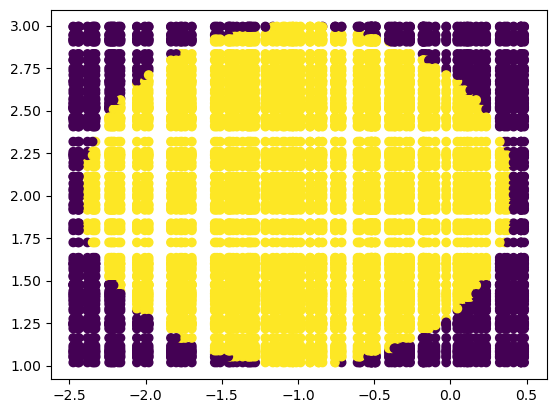

In [9]:
x= np.random.uniform(-2.5,0.5,100)
y= np.random.uniform(1,3,100)

X,Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X,Y, c=formula(X,Y))

In [11]:
xa = -2.5
xb = 0.5
ya = 1
yb = 3
N = np.logspace(1,5,5)
table1 = pd.DataFrame(columns=["Aproximación","Error relativo"], index=N)

def montercalo2(region, xa, xb, ya, yb, N):
    x_dardos = np.random.uniform(xa,xb,N)
    y_dardos = np.random.uniform(ya,yb,N)
    B = region(x_dardos,y_dardos)
    AR = (xb-xa)*(yb-ya)
    return np.mean(B)*AR

AR = (xb-xa)*(yb-ya)
def C (AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))

for i in N:
    AD = montercalo2(formula, xa,xb,ya,yb, int(i))
    table1.loc[i,"Aproximación"] = AD
    error_relativo = np.log10(C(AD, AR)) - np.log(i)/2
    table1.loc[i,"Error relativo"] = error_relativo
    
table1

,Aproximación,Error relativo
10.0,5.4,-1.628414
100.0,4.68,-2.577421
1000.0,4.524,-3.697096
10000.0,4.4436,-4.832977
100000.0,4.46184,-5.987719


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [13]:
import pandas as pd
import numpy as np

In [14]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [16]:
import random
x=[0]
y=[0]
for k in range(100000):
    i = random.choices([0,1,2,3], weights=df["$p_i$"])
    
    a=float(df["$a_i$"][i])
    b=float(df["$b_i$"][i])
    c=float(df["$c_i$"][i])
    d=float(df["$d_i$"][i])
    e=float(df["$e_i$"][i])
    f=float(df["$f_i$"][i])
    
    xkm1=a*x[-1] + b*y[-1] + e
    ykm1=c*x[-1] + d*y[-1] + f
    
    x.append(xkm1)
    y.append(ykm1)

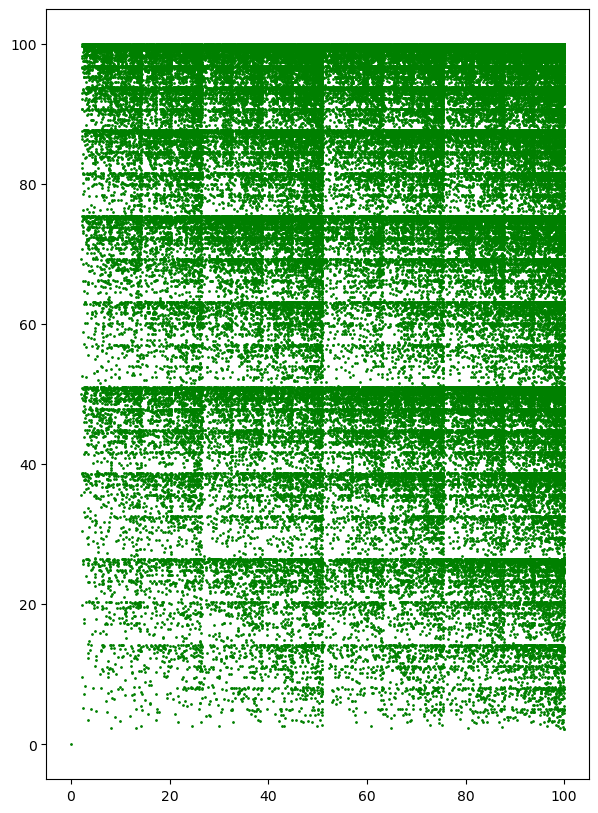

In [17]:
plt.figure(figsize=(7,10))
plt.scatter(x,y, s=1, c="g")

In [18]:
T0 = np.array([
    [0.5,0.0],
    [0.0,0.5]
])

D0 = np.array([1.0,1.0])

T1 = np.array([
    [0.5,0.0],
    [0.0,0.5]
])

D1 = np.array([50.0,1.0])

T2 = np.array([
    [0.5,0.0],
    [0.0,0.5]
])
D2 = np.array([1.0,50.0])

T3 = np.array([
    [0.5,0.0],
    [0.0,0.5]
])
D3= np.array([50.0,50.0])

x=[np.array([0,0])]
T=[T0,T1,T2,T3]
D=[D0,D1,D2,D3]

for k in range(100000):
    i = random.choices([0,1,2,3], weights=df["$p_i$"])[0]
    xkm1 = T[i]@x[-1]+D[i]
    x.append(xkm1)
    

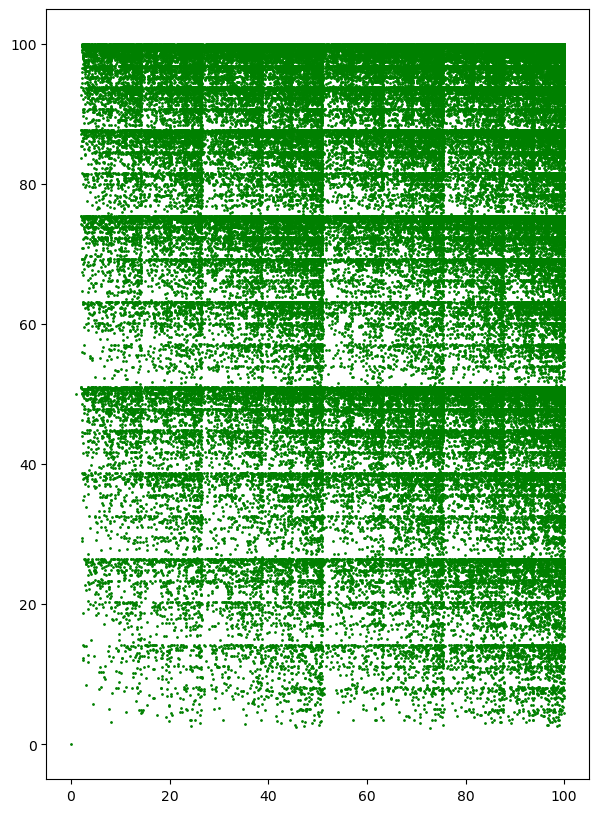

In [19]:
resultado = np.array(x)
plt.figure(figsize=(7,10))
plt.scatter(resultado[:,0],resultado[:,1], s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

AAPL, MSFT

In [20]:
import yfinance as yf

In [23]:
data = yf.download(["AAPL","MSFT"], "2015-01-01","2019-12-31")
data

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2015-01-02  24.498684   40.534843  27.332500   46.759998  27.860001   
2015-01-05  23.808512   40.162094  26.562500   46.330002  27.162500   
2015-01-06  23.810755   39.572624  26.565001   45.650002  26.857500   
2015-01-07  24.144636   40.075405  26.937500   46.230000  27.049999   
2015-01-08  25.072332   41.254356  27.972500   47.590000  28.037500   
...               ...         ...        ...         ...        ...   
2019-12-23  69.261604  151.994110  71.000000  157.410004  71.062500   
2019-12-24  69.327446  151.965149  71.067497  157.380005  71.222504   
2019-12-26  70.702919  153.210770  72.477501  158.669998  72.495003   
2019-12-27  70.676094  153.490799  72.449997  158.960007  73.492500   
2019-12-30  71.095581  152.167938  72.879997  157.589996  73.172501   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2015-01-02   47.419998  26.837500   46.540001  27.847500   46.660000   
2015-01-05   46.730000  26.352501   46.250000  27.072500   46.369999   
2015-01-06   46.750000  26.157499   45.540001  26.635000   46.380001   
2015-01-07   46.459999  26.674999   45.490002  26.799999   45.980000   
2015-01-08   47.750000  27.174999   46.720001  27.307501   46.750000   
...                ...        ...         ...        ...         ...   
2019-12-23  158.119995  70.092499  157.270004  70.132500  158.119995   
2019-12-24  157.710007  70.730003  157.119995  71.172501  157.479996   
2019-12-26  158.729996  71.175003  157.399994  71.205002  157.559998   
2019-12-27  159.550003  72.029999  158.220001  72.779999  159.449997   
2019-12-30  159.020004  71.305000  156.729996  72.364998  158.990005   

               Volume            
                 AAPL      MSFT  
Date                             
2015-01-02  212818400  27913900  
2015-01-05  257142000  39673900  
2015-01-06  263188400  36447900  
2015-01-07  160423600  29114100  
2015-01-08  237458000  29645200  
...               ...       ...  
2019-12-23   98572000  17718200  
2019-12-24   48478800   8989200  
2019-12-26   93121200  14520600  
2019-12-27  146266000  18412800  
2019-12-30  144114400  16348400  

[1257 rows x 12 columns]

In [26]:
data = data["Adj Close"]

Calcule los rendimientos diarios junto con sus características estadísticas

In [27]:
R=(data-data.shift())/data.shift()
R

,AAPL,MSFT
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.028172,-0.009196
2015-01-06,0.000094,-0.014677
2015-01-07,0.014022,0.012705
2015-01-08,0.038422,0.029418
...,...,...
2019-12-23,0.016318,0.000000
2019-12-24,0.000951,-0.000191
2019-12-26,0.019840,0.008197


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?